# TASK 1
Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("Titanic-Dataset.csv")


In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.shape

(891, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Preprocessing

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
survived_count = len(df[df["Survived"] == 1])
non_survived_count = len(df[df["Survived"] == 0])

outlier_ratio = survived_count / non_survived_count

print("Outlier Ratio: {:.2f}".format(outlier_ratio))
print("Survived: {}".format(survived_count))
print("Non-Survived: {}".format(non_survived_count))


Outlier Ratio: 0.62
Survived: 342
Non-Survived: 549


# Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

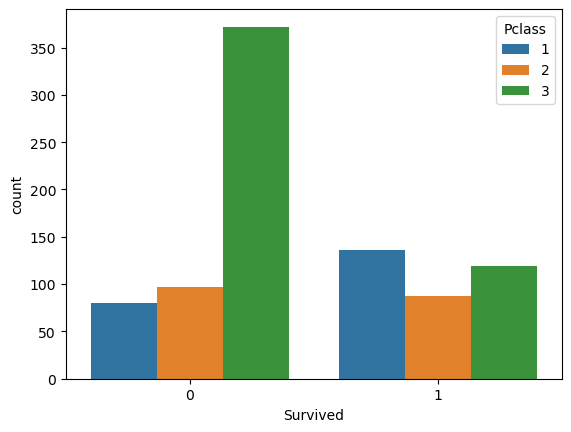

In [17]:
sns.countplot(x= df["Survived"] , hue = df["Pclass"])

<AxesSubplot:xlabel='Survived', ylabel='count'>

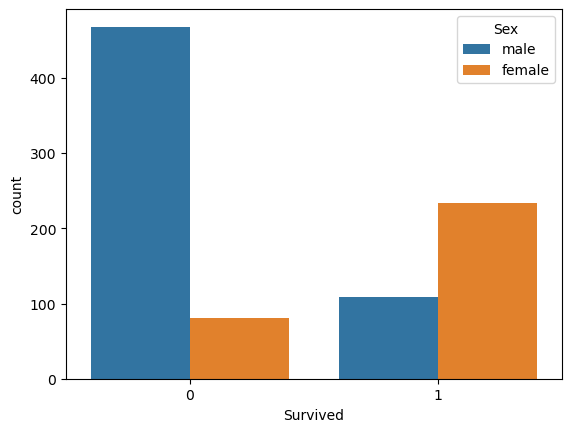

In [18]:
 sns.countplot(x= df["Survived"] , hue = df["Sex"])

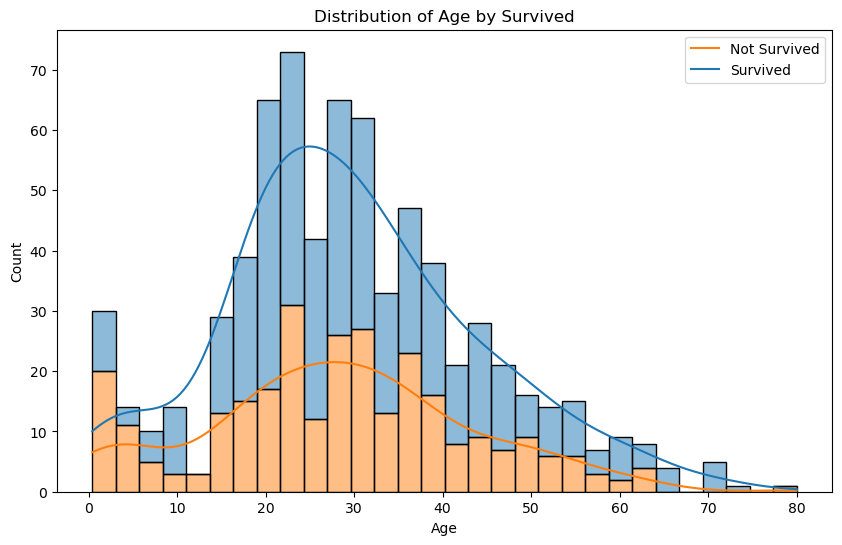

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True, hue='Survived', multiple='stack')
plt.title('Distribution of Age by Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

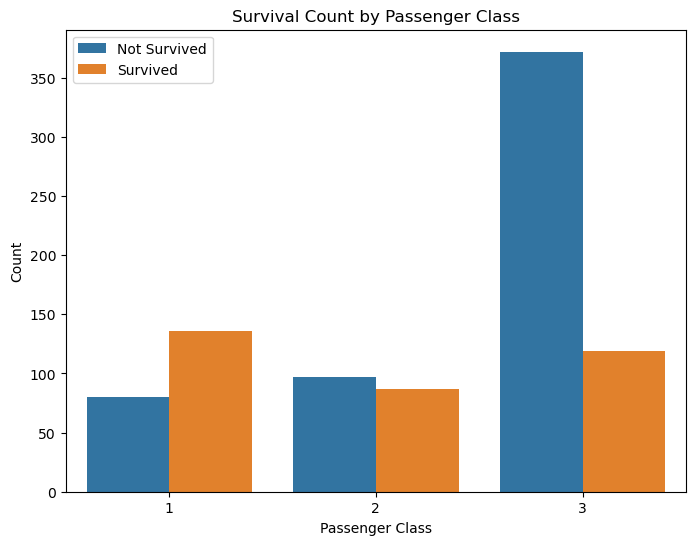

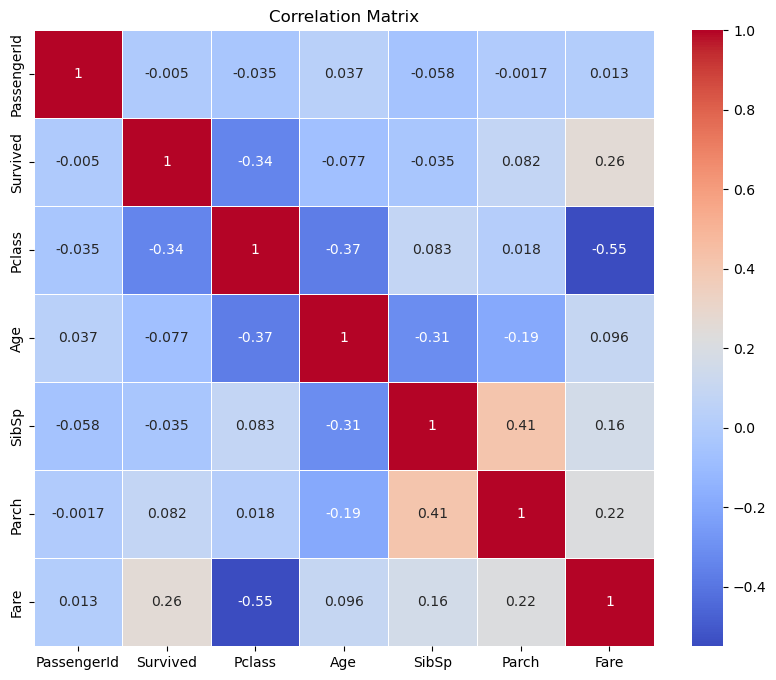

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

# Explore correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

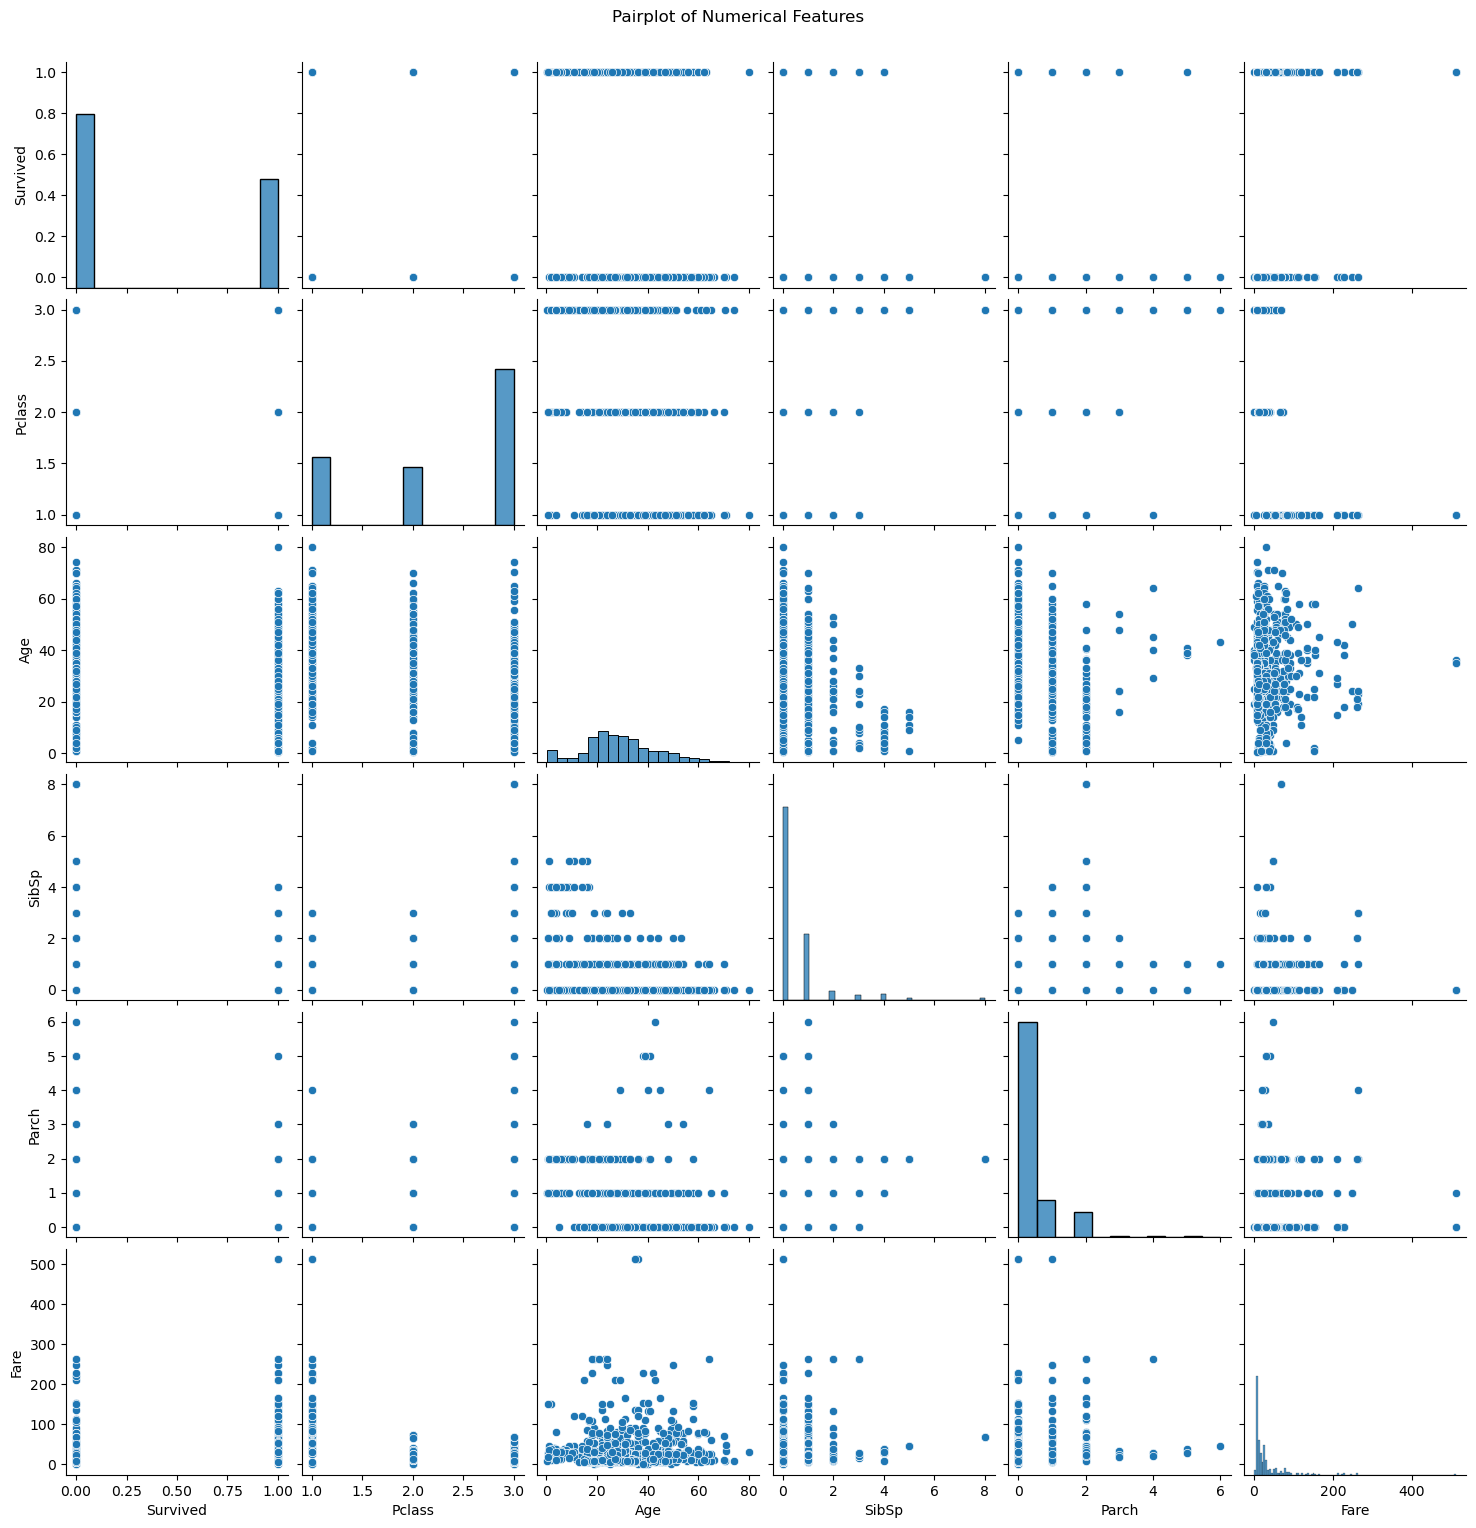

In [41]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

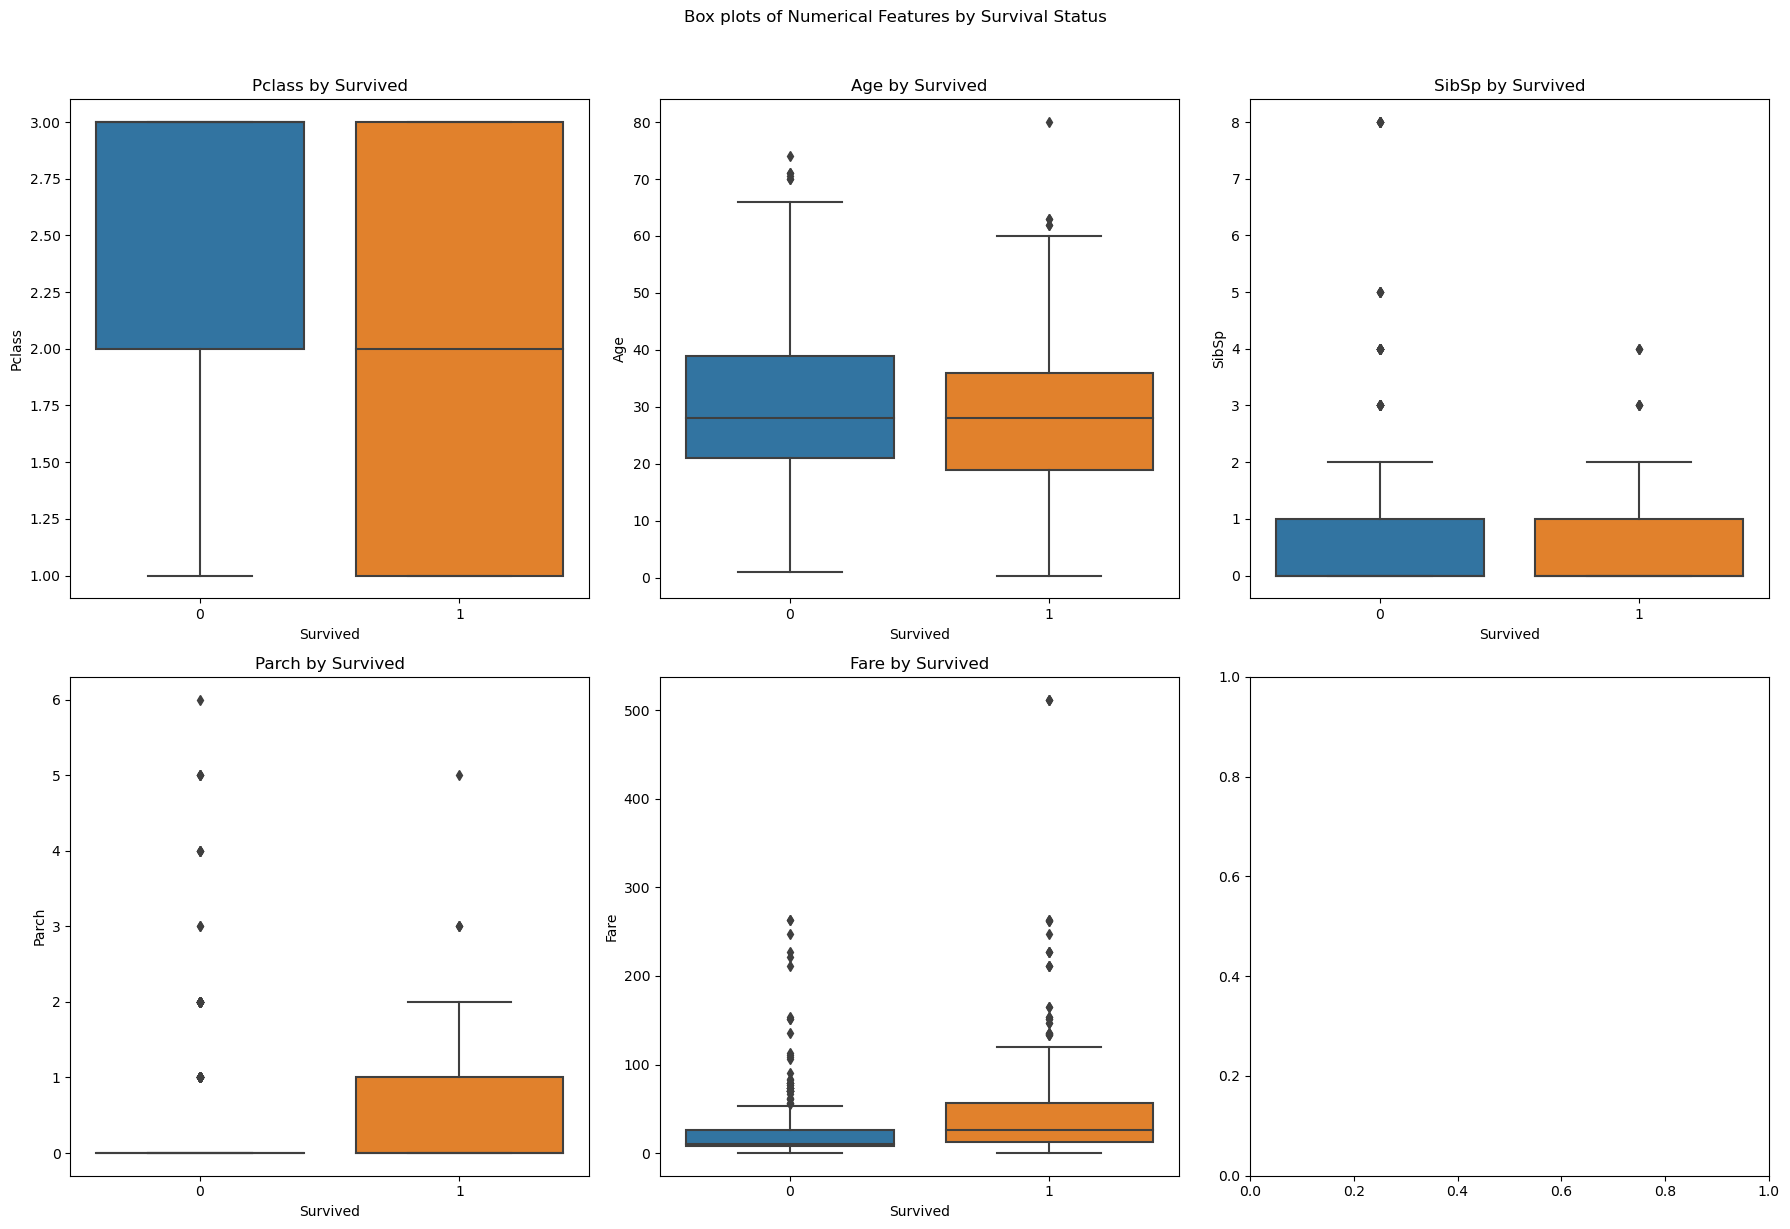

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for i, col in enumerate(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']):
    sns.boxplot(x='Survived', y=col, data=df, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{col} by Survived')
plt.suptitle('Box plots of Numerical Features by Survival Status', y=1.02)
plt.tight_layout()
plt.show()


In [19]:
labelencoder = LabelEncoder() # Conversion of Categorical values into Numerical values
df['Sex'] = labelencoder.fit_transform(df['Sex'])

df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [20]:
features = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]
target = df["Survived"]

In [22]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Traning

In [23]:
x=df[['Pclass', 'Sex']]
y=target
x_train , x_test, y_train, y_test = train_test_split(features,y, test_size= 0.2, random_state= 0)

from sklearn.impute import SimpleImputer # It is used to fill the missing values of the dataset.
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Model Selection

In [24]:
model = RandomForestClassifier()
model.fit(x_train_imputed, y_train)

RandomForestClassifier()

In [25]:
predictions = model.predict(x_test_imputed)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute and print accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}".format(accuracy))

# Compute and print precision
precision = precision_score(y_test, predictions)
print("Precision: {:.2f}".format(precision))

# Compute and print recall
recall = recall_score(y_test, predictions)
print("Recall: {:.2f}".format(recall))

# Compute and print F1-score
f1 = f1_score(y_test, predictions)
print("F1-Score: {:.2f}".format(f1))


Accuracy: 0.82
Precision: 0.81
Recall: 0.70
F1-Score: 0.75


In [27]:
import joblib
joblib.dump(model,"Titanic_Survival")

['Titanic_Survival']

In [28]:
m = joblib.load("Titanic_Survival")

In [29]:
prediction  = m.predict([[1,1,0,1,1,1]])
prediction

array([1], dtype=int64)

In [30]:
if prediction==0:
  print("Non Survived")
else:
  print("Survived")

Survived
